In [1]:
from numpy import *

In [2]:
#Intrinsic parameters
a_u = 557.0943
a_v = 712.9824
u_0 = 326.3819
v_0 = 298.6679
gamma = 0
# Location of the world reference frame in camera coordinates in mm
Tx = 100
Ty = 0
Tz = 1500
# World rotation w.r.t. camera coordinates Euler XYX1 angles
Phix = 0.8*pi/2
Phiy = -1.8*pi/2
Phix1 = pi/5

In [3]:
K = array([[a_u, gamma, u_0],
          [0, a_v, v_0],
          [0, 0, 1]])
K.shape

(3, 3)

In [4]:
from math import *

In [5]:
ctw = array([[Tx],[Ty],[Tz]])
ctw.shape
ctw

array([[ 100],
       [   0],
       [1500]])

In [6]:
R_x = array([[1, 0, 0],
              [0, cos(Phix), -sin(Phix)],
              [0, sin(Phix), cos(Phix)]])
R_y = array([[cos(Phiy), 0, sin(Phiy)],
              [0, 1, 0],
              [-sin(Phiy), 0, cos(Phiy)]])
# R_z = array([[cos(Phix1), -sin(Phix1), 0],
#               [sin(Phix1), cos(Phix1), 0],
#               [0, 0, 1]])
R_x1 = array([[1, 0, 0],
              [0, cos(Phix1), -sin(Phix1)],
              [0, sin(Phix1), cos(Phix1)]])
#what to take the order of rotation? How to decide?
cRw = R_x * R_y * R_x1
# cTw = array([[Tx],[Ty],[Tz]])
cTw=array([[cRw[0,0], cRw[0,1], cRw[0,2], ctw[0,0]],
          [cRw[1,0], cRw[1,1], cRw[1,2], ctw[1,0]],
          [cRw[2,0], cRw[2,1], cRw[2,2], ctw[2,0]],
          [0, 0, 0, 1]])

In [7]:
cTw

array([[-9.51056516e-01,  0.00000000e+00, -0.00000000e+00,
         1.00000000e+02],
       [ 0.00000000e+00,  2.50000000e-01,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.37764129e-01,
         1.50000000e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [8]:
P = K @ array([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0]]) @ cTw

In [9]:
P.shape

(3, 4)

In [10]:
P = P/P[2,3]

In [11]:
P

array([[-3.53218776e-01,  0.00000000e+00, -5.17346055e-02,
         3.63521520e+02],
       [ 0.00000000e+00,  1.18830400e-01, -4.73416754e-02,
         2.98667900e+02],
       [ 0.00000000e+00,  0.00000000e+00, -1.58509419e-04,
         1.00000000e+00]])

In [9]:
three_d = random.randint(-480, 480, size=(6, 3))


In [10]:
ones_ = ones((6,1))

In [11]:
ones_.shape

(6, 1)

In [12]:
three_d_homo = concatenate((three_d, ones_), axis=1).T

In [13]:
three_d_homo

array([[-275.,  109.,   75.,  -85., -136., -229.],
       [-212.,  234.,  141., -225., -157.,  373.],
       [-313., -254.,   35., -415., -200.,  380.],
       [   1.,    1.,    1.,    1.,    1.,    1.]])

In [14]:
three_d_homo.shape

(4, 6)

In [15]:
from numpy import *

In [16]:
cRw = R_x * R_y * R_x1
cRw1 = R_x1 * R_y * R_x
print(f"This is the value of cRw {cRw}")
print(f"This is the value of cRw1 {cRw1}")

This is the value of cRw [[-0.95105652  0.         -0.        ]
 [ 0.          0.25        0.        ]
 [ 0.          0.         -0.23776413]]
This is the value of cRw1 [[-0.95105652  0.         -0.        ]
 [ 0.          0.25        0.        ]
 [ 0.          0.         -0.23776413]]


In [17]:
print(P.shape)
print(three_d_homo.shape)

(3, 4)
(4, 6)


In [33]:
two_dimensional_homo = (P @ three_d_homo)

In [34]:
two_dimensional_homo[0:2,]

array([[476.84961495, 338.16126319, 335.2194006 , 415.01497724,
        421.90619465, 424.74946966],
       [288.29379961, 338.49899916, 313.76602776, 291.5778553 ,
        289.47986228, 325.00180254]])

In [35]:
two_dimensional_homo[2:3,]

array([[1.04961345, 1.04026139, 0.99445217, 1.06578141, 1.03170188,
        0.93976642]])

In [36]:
two_dimensional_homo.shape

(3, 6)

In [55]:
two_d_cartesian_coordinates = two_dimensional_homo[0:2,]/two_dimensional_homo[2:3,]

In [56]:
two_d_cartesian_coordinates

array([[454.30974206, 325.07335716, 337.08951582, 389.39971529,
        408.94196399, 451.97344822],
       [274.66664045, 325.39802168, 315.51645934, 273.5812924 ,
        280.58479567, 345.83253392]])

In [57]:
x = two_d_cartesian_coordinates[0, :]
y = two_d_cartesian_coordinates[1, :]

In [ ]:
import matplotlib.pyplot as plt

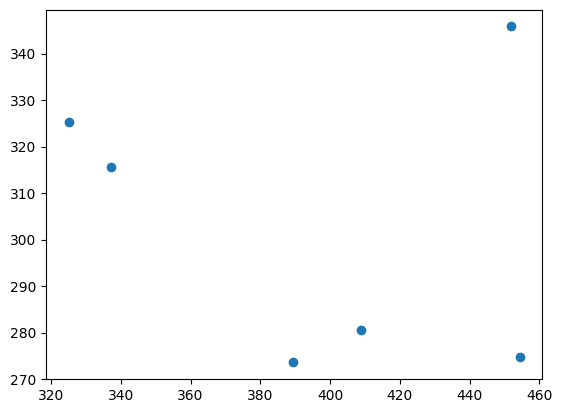

In [41]:
plt.scatter(x, y)

In [49]:
three_d_homo[0:3, :]/three_d_homo[3:4, :]

array([[-275.,  109.,   75.,  -85., -136., -229.],
       [-212.,  234.,  141., -225., -157.,  373.],
       [-313., -254.,   35., -415., -200.,  380.]])

In [52]:
three_d_cartesian = three_d_homo[0:3, :]/three_d_homo[3:4, :]

(6, 3)

In [53]:
Xw, Yw, Zw = three_d_cartesian[:, 0]

In [54]:
Xw, Yw, Zw

(-275.0, -212.0, -313.0)

In [59]:
n = three_d_cartesian.shape[1]
Q = zeros((2*n, 11))
B = zeros((2*n, 1))

In [60]:
for i in range(n):
    Xw, Yw, Zw = three_d_cartesian[:, i]
    Xu, Yu = two_d_cartesian_coordinates[:, i]
    # First row for Xu
    Q[2*i] = [Xw, Yw, Zw, 1, 0, 0, 0, 0, -Xu*Xw, -Xu*Yw, -Xu*Zw]
    B[2*i] = Xu
    # Second row for Yu
    Q[2*i + 1] = [0, 0, 0, 0, Xw, Yw, Zw, 1, -Yu*Xw, -Yu*Yw, -Yu*Zw]
    B[2*i + 1] = Yu

In [62]:
Q.shape

(12, 11)

In [64]:
B.shape

(12, 1)

In [80]:
A, residuals, rank, s = linalg.lstsq(Q, B, rcond=None)

In [81]:
A

array([[-3.53218776e-01],
       [ 4.98507130e-11],
       [-5.17346055e-02],
       [ 3.63521520e+02],
       [ 3.15468271e-11],
       [ 1.18830400e-01],
       [-4.73416755e-02],
       [ 2.98667900e+02],
       [ 7.40644525e-14],
       [ 1.80400508e-13],
       [-1.58509420e-04]])

In [85]:
A.shape

(11, 1)

In [86]:
A = append(A, [1])

In [87]:
A.shape

(12,)

In [88]:
A = A.reshape(-1, 1)

In [89]:
A.shape

(12, 1)

In [100]:
A[4:8]

array([[ 3.15468271e-11],
       [ 1.18830400e-01],
       [-4.73416755e-02],
       [ 2.98667900e+02]])

In [98]:
P = zeros((3,4))
lower_limit = 0
upper_limit = 4
for i in range(3):
    P[i, :] = A[lower_limit:upper_limit].T
    lower_limit += 4
    upper_limit += 4

In [99]:
P

array([[-3.53218776e-01,  4.98507130e-11, -5.17346055e-02,
         3.63521520e+02],
       [ 3.15468271e-11,  1.18830400e-01, -4.73416755e-02,
         2.98667900e+02],
       [ 7.40644525e-14,  1.80400508e-13, -1.58509420e-04,
         1.00000000e+00]])